In [2]:
import json
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt

In [3]:
i = [f for f in glob.glob("2D3D-comp-teb-smwh-5-burger/*.ftr")]
i

['2D3D-comp-teb-smwh-5-burger/3d.ftr', '2D3D-comp-teb-smwh-5-burger/2d.ftr']

In [6]:
data = pd.read_feather(i[0])
data_succ = data[data.success!=False]
data_succ = data_succ.drop(axis=1, columns='collision')
data_succ = data_succ[:max(data_succ['episode'])]
tree_d = data_succ
tree_d['num'] = 3
tree_d

In [ ]:
two_d = data_succ
two_d['num'] = 2
two_d = two_d[1:14]
two_d

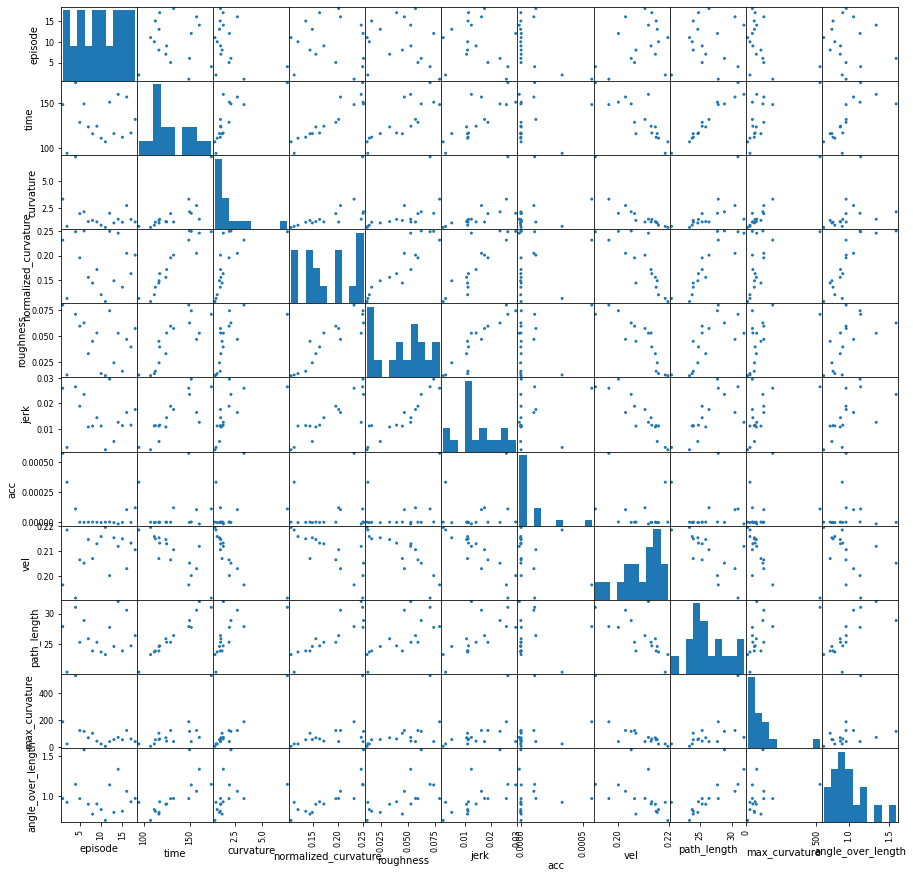

In [180]:
pd.plotting.scatter_matrix(data_succ[1:max(data_succ['episode'])],alpha=1., figsize=[15,15]);

In [ ]:

plt.errorbar(data.episode[:max(data['episode'])], data.vel[:max(data['episode'])], yerr=data.vel[max(data['episode'])+1:], fmt='.k');
# plt.errorbar(data.episode[:max(data_succ['episode'])], data_succ.acc[:max(data_succ['episode'])], yerr=data_succ.acc[max(data_succ['episode'])+1:], fmt='.k');
#plt.errorbar(data_succ.episode[:max(data_succ['episode'])], data_succ.jerk[:max(data_succ['episode'])], yerr=data_succ.jerk[max(data_succ['episode'])+1:], fmt='.k');
#plt.errorbar(data_succ.episode[:max(data_succ['episode'])], data_succ.jerk[:max(data_succ['episode'])], yerr=data_succ.jerk[max(data_succ['episode'])+1:], fmt='.k');

Plotting 2 datasets

In [ ]:
#two_d['num']=2

data = two_d
data=data.append(tree_d)
data

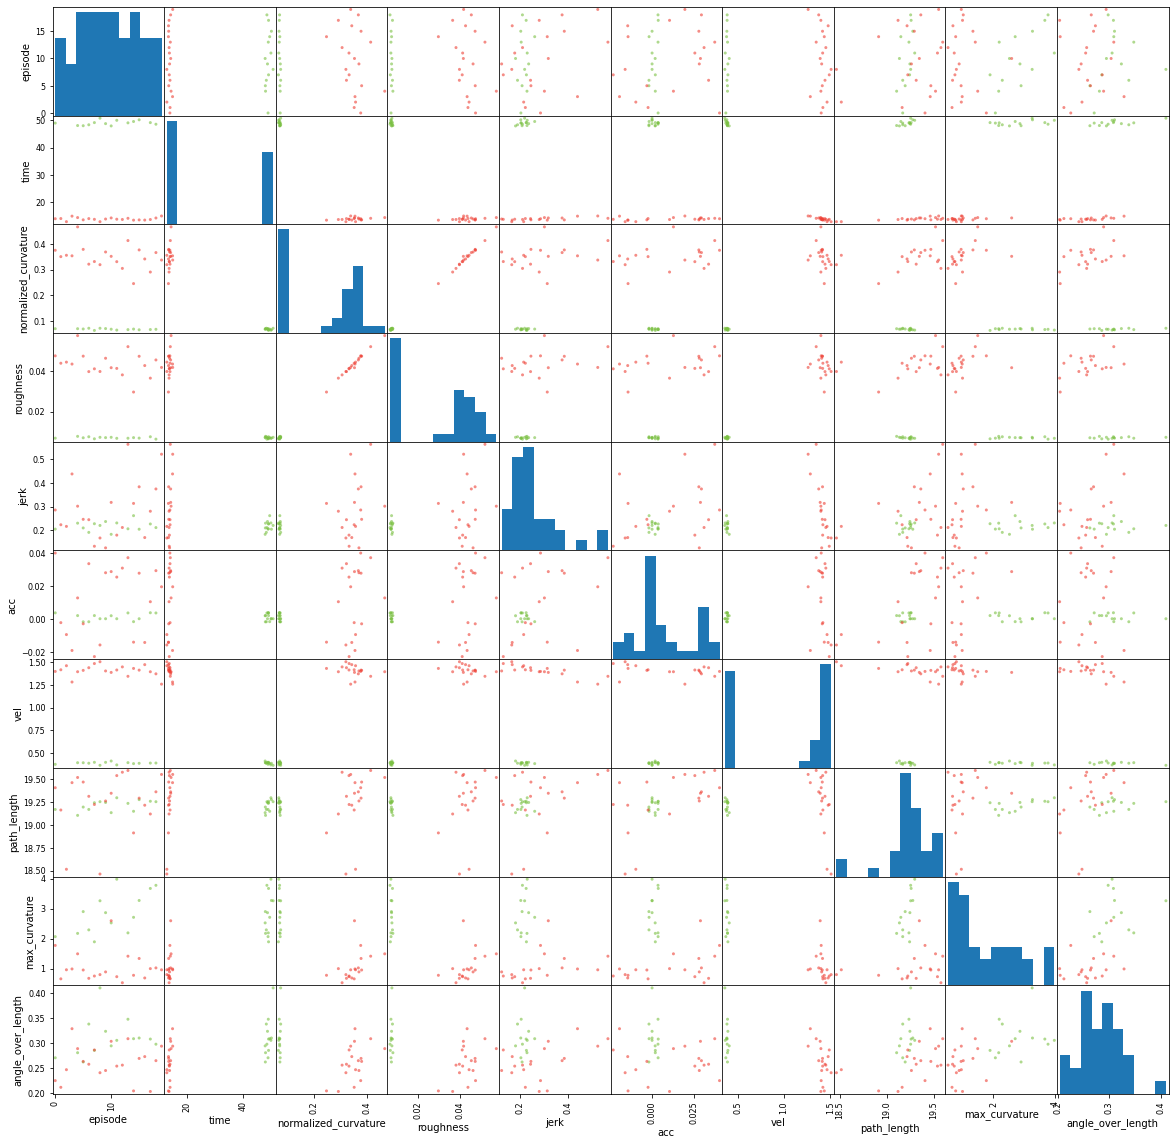

In [172]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = data["num"].map(lambda x: color_wheel.get(x))
# print(colors)
ax = pd.plotting.scatter_matrix(data.drop(['num', 'curvature'], axis=1), color=colors, alpha=0.6, figsize=(20, 20), diagonal='hist')
# grün ist b2D

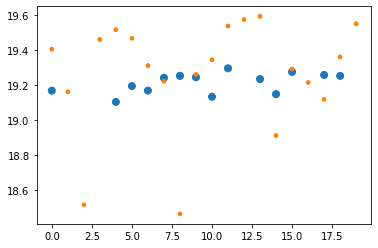

In [173]:
for d in [data[data.num==2], data[data.num==3]]:
    plt.scatter(d.episode, d.path_length, s=d.time)

In [164]:
data

,episode,time,curvature,normalized_curvature,roughness,jerk,acc,vel,path_length,success,done_reason,max_curvature,angle_over_length,num
0,0,49.030,0.248198,0.070604,0.006883,0.205174,3.568877e-03,0.371884,19.167905,True,goal_reached,2.063955,0.270556,2
4,4,48.130,0.279494,0.070609,0.007779,0.230203,1.911136e-03,0.389745,19.103285,True,goal_reached,2.172230,0.280685,2
5,5,48.060,0.299965,0.069504,0.007072,0.210044,-1.871837e-03,0.389401,19.194150,True,goal_reached,2.899337,0.262163,2
6,6,48.410,0.280199,0.072399,0.007573,0.191321,-1.836266e-03,0.384051,19.168173,True,goal_reached,2.289126,0.337956,2
7,7,49.210,0.229581,0.063947,0.006565,0.227821,1.920722e-03,0.394208,19.241398,True,goal_reached,1.891014,0.285322,2
8,8,50.850,0.318611,0.072345,0.007304,0.220536,-2.695743e-06,0.361056,19.252726,True,goal_reached,3.260186,0.410176,2
9,9,48.830,0.307952,0.071083,0.007148,0.237044,-1.279045e-06,0.393920,19.244455,True,goal_reached,2.863637,0.323470,2
10,10,47.990,0.292047,0.068693,0.007311,0.183213,1.824652e-03,0.408540,19.132897,True,goal_reached,2.522350,0.294362,2
11,11,50.060,0.296818,0.065331,0.006817,0.231104,-4.315223e-07,0.365481,19.295621,True,goal_reached,3.980474,0.305406,2
13,13,49.120,0.263895,0.067066,0.006858,0.206399,3.523438e-03,0.390337,19.234365,True,goal_reached,2.188919,0.347607,2
